In [56]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv("モデル構築用.csv", encoding="sjis")
origin_columns = df.columns
df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]

df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2013/2/3,1.820570e+12,133504,3,2,3,502,0,182,182,...,0,1,2,0,0,0,0,6,0,0
1,2013/6/18,5.050290e+12,145329,5,99,0,1,2814,2814,505,...,0,0,1,2,1,0,0,0,0,0
2,2013/6/28,1.820590e+12,115136,5,99,0,1,2779,2779,182,...,1,0,1,1,0,8,1,0,0,0
3,2013/8/9,1.270660e+12,95034,5,99,0,1,223,223,127,...,0,1,2,0,0,0,0,0,0,0
4,2014/1/27,2.090350e+12,165240,5,99,0,1,1836,1836,209,...,0,0,2,0,0,0,0,0,0,0


In [9]:
df = df.drop(['offer_date', 'birth'], axis=1)
df.head()

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,1.820570e+12,133504,3,2,3,502,0,182,182,1,...,0,1,2,0,0,0,0,6,0,0
1,5.050290e+12,145329,5,99,0,1,2814,2814,505,1,...,0,0,1,2,1,0,0,0,0,0
2,1.820590e+12,115136,5,99,0,1,2779,2779,182,1,...,1,0,1,1,0,8,1,0,0,0
3,1.270660e+12,95034,5,99,0,1,223,223,127,1,...,0,1,2,0,0,0,0,0,0,0
4,2.090350e+12,165240,5,99,0,1,1836,1836,209,1,...,0,0,2,0,0,0,0,0,0,0


In [36]:
print('事故', np.sum(df['month12_jiko'] == 1))
print('安全', np.sum(df['month12_jiko'] == 0))

事故 1604
安全 9024


In [155]:
print('事故', np.sum(test_df['month12_jiko'] == 1))
print('安全', np.sum(test_df['month12_jiko'] == 0))

事故 317
安全 1809


In [154]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=0)
train_X = train_df.drop('month12_jiko',axis=1)
test_X = test_df.drop('month12_jiko',axis=1)
train_y = train_df['month12_jiko']
test_y = test_df['month12_jiko']

In [156]:
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.1s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

In [157]:
pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [158]:
print('RMSE : ', np.sqrt(mean_squared_error(test_y, pred_y_reg)))
print('R^2 : ', r2_score(test_y, pred_y_reg, multioutput='variance_weighted'))

RMSE :  0.34761386971498004
R^2 :  0.04759233042556488


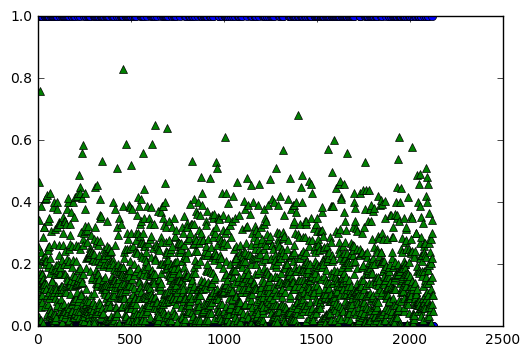

In [159]:
number = len(list(test_y))
plt.figure()
plt.plot(list(test_y)[0:number], 'o')
plt.plot(list(pred_y_reg)[0:number], '^')
plt.show()

In [160]:
rf_cla = RandomForestClassifier(verbose = 1, n_estimators=100, max_depth=20)
rf_cla.fit(train_X,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [161]:
pred_y_cla = rf_cla.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [176]:
accuracy_score(test_y, pred_y_cla)

0.8532455315145814

In [162]:
print('RMSE : ', np.sqrt(mean_squared_error(test_y, pred_y_cla)))
print('R^2 : ', r2_score(test_y, pred_y_cla, multioutput='variance_weighted'))

RMSE :  0.3830854584624932
R^2 :  -0.1566981077786671


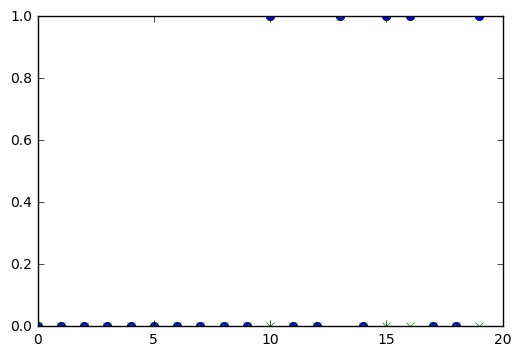

In [163]:
number = 20
plt.figure()
plt.plot(list(test_y)[0:number], 'o')
plt.plot(list(pred_y_cla)[0:number], 'x')
plt.show()

In [164]:
threshold = 0.2
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [165]:
#RF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[1258,  551],
       [ 149,  168]])

In [166]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[1807,    2],
       [ 310,    7]])

In [177]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [178]:
operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), threshold)[2]

3660

In [194]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

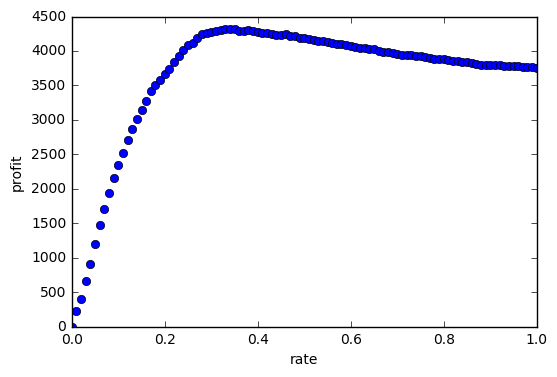

In [195]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [183]:
print(np.max(profit_list))
print(np.argmax(profit_list))

4323
33


In [198]:
#営業利益の算出(一次関数_ver2)
def operating_profit_linear_ver2(y_pred_reg, y_pred_cla, y_test, offset_n, offset_m):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset_n:
            gain_list.append(0)
        elif i <= offset_n and i >= offset_m:
            gain_list.append(int((-45/(offset_n-offset_m))*i+(45*offset_n/(offset_n-offset_m))+5))
        elif i < offset_m:
            gain_list.append(50)
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [213]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [221]:
profit_list_max_n = []
for i in range(len(profit_list)):
    profit_list_max_n.append(np.max(profit_list[i]))

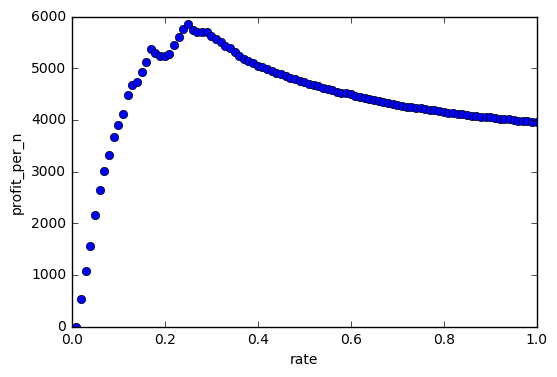

In [222]:
plt.figure()
plt.plot(para_list, profit_list_max_n, 'o')
plt.xlabel('rate')
plt.ylabel("profit_per_n")
plt.show()

In [189]:
#営業利益の算出(二次関数)
def operating_profit_quadratic(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int((45/np.square(offset))*np.square(i)-(90/offset)*i+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [190]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_quadratic(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

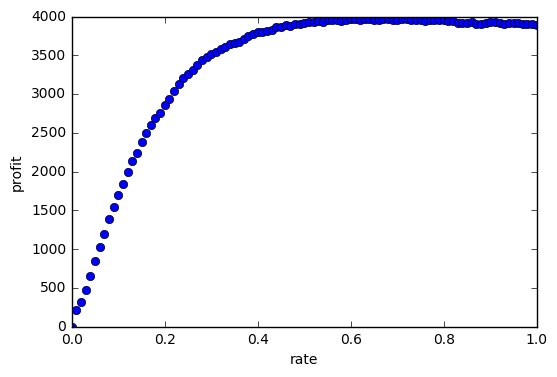

In [193]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

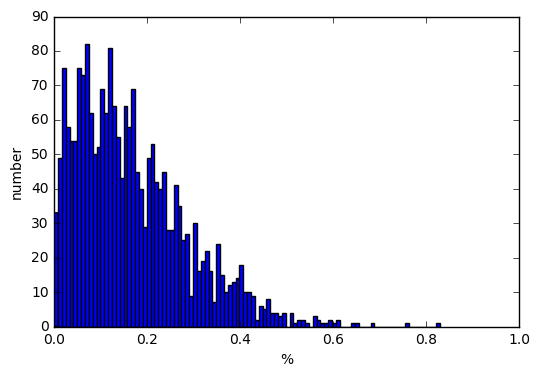

In [197]:
plt.figure()
plt.hist(pred_y_reg,bins=100)
plt.xlim(0, 1)
plt.ylim(0)
plt.xlabel('%')
plt.ylabel("number")
plt.show()